In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

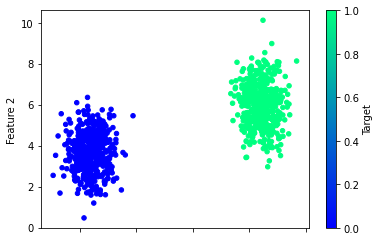

In [2]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [3]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [4]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [5]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [6]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [7]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [8]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [10]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 1s 1ms/step - loss: 1.0001 - accuracy: 0.0947
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.9689 - accuracy: 0.0800
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.9412 - accuracy: 0.0880
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.9157 - accuracy: 0.0947
Epoch 5/100
24/24 [==============================] - 0s 3ms/step - loss: 0.8931 - accuracy: 0.1053
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.8724 - accuracy: 0.1160
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.8540 - accuracy: 0.1227
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.8375 - accuracy: 0.1387
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.8226 - accuracy: 0.1507
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.8094 - accuracy: 0.1707
Epoch 11/

24/24 [==============================] - 0s 1ms/step - loss: 0.6907 - accuracy: 0.5067
Epoch 84/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6903 - accuracy: 0.5067
Epoch 85/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6898 - accuracy: 0.5067
Epoch 86/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6892 - accuracy: 0.5067
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6883 - accuracy: 0.5067
Epoch 88/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6869 - accuracy: 0.5067
Epoch 89/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6850 - accuracy: 0.5067
Epoch 90/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6824 - accuracy: 0.5067
Epoch 91/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6787 - accuracy: 0.5067
Epoch 92/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6735 - accuracy: 0.5067
Epoch 93/100


<AxesSubplot:>

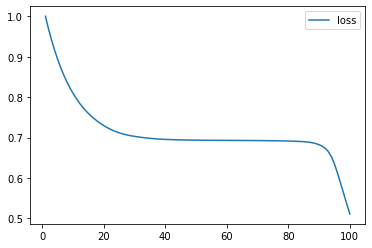

In [11]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

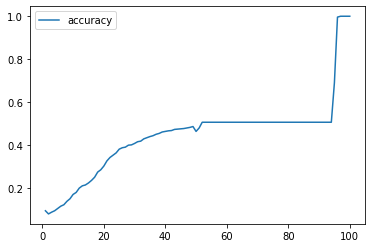

In [12]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [13]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.5057 - accuracy: 1.0000 - 141ms/epoch - 18ms/step
Loss: 0.5057244300842285, Accuracy: 1.0


In [14]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]])

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

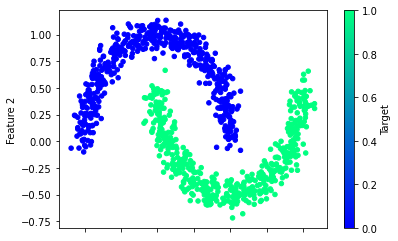

In [15]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [16]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [17]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5785 - accuracy: 0.7040
Epoch 2/100
24/24 [==============================] - 0s 3ms/step - loss: 0.5700 - accuracy: 0.7173
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5609 - accuracy: 0.7333
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5519 - accuracy: 0.7427
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5431 - accuracy: 0.7533
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5346 - accuracy: 0.7600
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5262 - accuracy: 0.7667
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5185 - accuracy: 0.7733
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5110 - accuracy: 0.7773
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5039 - accuracy: 0.7840
Epoch 11/

24/24 [==============================] - 0s 2ms/step - loss: 0.2929 - accuracy: 0.8933
Epoch 84/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2923 - accuracy: 0.8933
Epoch 85/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2916 - accuracy: 0.8933
Epoch 86/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2911 - accuracy: 0.8933
Epoch 87/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2905 - accuracy: 0.8933
Epoch 88/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2900 - accuracy: 0.8933
Epoch 89/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2894 - accuracy: 0.8933
Epoch 90/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2889 - accuracy: 0.8933
Epoch 91/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2883 - accuracy: 0.8933
Epoch 92/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2877 - accuracy: 0.8933
Epoch 93/100


<AxesSubplot:>

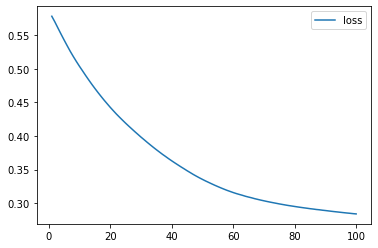

In [18]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

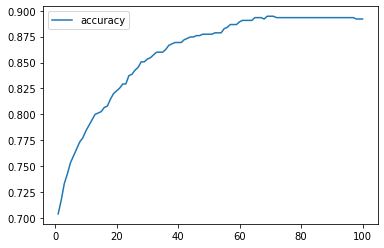

In [19]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [20]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [21]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [22]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7221 - accuracy: 0.3827
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6947 - accuracy: 0.4093
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6714 - accuracy: 0.4347
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6503 - accuracy: 0.4587
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6308 - accuracy: 0.5440
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6121 - accuracy: 0.5933
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5929 - accuracy: 0.6480
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5741 - accuracy: 0.6840
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5555 - accuracy: 0.7173
Epoch 10/100
24/24 [==============================] - 0s 3ms/step - loss: 0.5371 - accuracy: 0.7440
Epoch 11/

24/24 [==============================] - 0s 5ms/step - loss: 0.1375 - accuracy: 0.9480
Epoch 84/100
24/24 [==============================] - 0s 4ms/step - loss: 0.1361 - accuracy: 0.9480
Epoch 85/100
24/24 [==============================] - 0s 2ms/step - loss: 0.1345 - accuracy: 0.9480
Epoch 86/100
24/24 [==============================] - 0s 2ms/step - loss: 0.1329 - accuracy: 0.9507
Epoch 87/100
24/24 [==============================] - 0s 2ms/step - loss: 0.1313 - accuracy: 0.9507
Epoch 88/100
24/24 [==============================] - 0s 3ms/step - loss: 0.1298 - accuracy: 0.9507
Epoch 89/100
24/24 [==============================] - 0s 4ms/step - loss: 0.1283 - accuracy: 0.9533
Epoch 90/100
24/24 [==============================] - 0s 4ms/step - loss: 0.1268 - accuracy: 0.9533
Epoch 91/100
24/24 [==============================] - 0s 3ms/step - loss: 0.1253 - accuracy: 0.9533
Epoch 92/100
24/24 [==============================] - 0s 5ms/step - loss: 0.1238 - accuracy: 0.9533
Epoch 93/100


In [24]:
# Import our dependencies
import pandas as pd
import sklearn as skl

# Read in our ramen data
ramen_df = pd.read_csv("ramen-ratings.csv")

# Print out the Country value counts
country_counts = ramen_df.Country.value_counts()
country_counts

Japan            352
USA              323
South Korea      309
Taiwan           224
Thailand         191
China            169
Malaysia         156
Hong Kong        137
Indonesia        126
Singapore        109
Vietnam          108
UK                69
Philippines       47
Canada            41
India             31
Germany           27
Mexico            25
Australia         22
Netherlands       15
Myanmar           14
Nepal             14
Pakistan           9
Hungary            9
Bangladesh         7
Colombia           6
Brazil             5
Cambodia           5
Fiji               4
Holland            4
Poland             4
Finland            3
Sarawak            3
Sweden             3
Dubai              3
Ghana              2
Estonia            2
Nigeria            1
United States      1
Name: Country, dtype: int64

<AxesSubplot:ylabel='Density'>

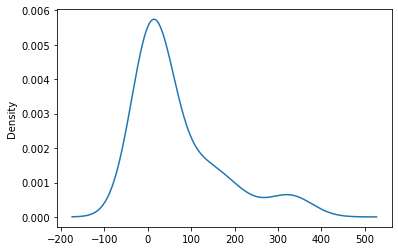

In [25]:
# Visualize the value counts
country_counts.plot.density()

In [26]:
# Determine which values to replace
replace_countries = list(country_counts[country_counts < 100].index)

# Replace in DataFrame
for country in replace_countries:
    ramen_df.Country = ramen_df.Country.replace(country,"Other")


# Check to make sure binning was successful
ramen_df.Country.value_counts()

Other          376
Japan          352
USA            323
South Korea    309
Taiwan         224
Thailand       191
China          169
Malaysia       156
Hong Kong      137
Indonesia      126
Singapore      109
Vietnam        108
Name: Country, dtype: int64

In [27]:
# Create the OneHotEncoder instance
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_df = pd.DataFrame(enc.fit_transform(ramen_df.Country.values.reshape(-1,1)))

# Rename encoded columns
encode_df.columns = enc.get_feature_names(['Country'])
encode_df.head()

,Country_China,Country_Hong Kong,Country_Indonesia,Country_Japan,Country_Malaysia,Country_Other,Country_Singapore,Country_South Korea,Country_Taiwan,Country_Thailand,Country_USA,Country_Vietnam
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
# Merge the two DataFrames together and drop the Country column
ramen_df.merge(encode_df,left_index=True,right_index=True).drop("Country",1)

C:\Users\z0029b0\Anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,Review #,Brand,Variety,Style,Stars,Top Ten,Country_China,Country_Hong Kong,Country_Indonesia,Country_Japan,Country_Malaysia,Country_Other,Country_Singapore,Country_South Korea,Country_Taiwan,Country_Thailand,Country_USA,Country_Vietnam
0,2580,New Touch,T's Restaurant Tantanmen,Cup,3.75,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,2.25,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,2.75,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2576,Ching's Secret,Singapore Curry,Pack,3.75,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,3.5,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2576,4,Wai Wai,Oriental Style Instant Noodles,Pack,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2577,3,Wai Wai,Tom Yum Shrimp,Pack,2,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2578,2,Wai Wai,Tom Yum Chili Flavor,Pack,2,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [29]:
# Import our dependencies
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Read in our dataset
hr_df = pd.read_csv("hr_dataset.csv")
hr_df.head()

,Satisfaction_Level,Num_Projects,Time_Spent,Num_Promotions
0,0.30,1,253,2
1,0.25,1,200,0
2,0.90,4,2880,5
3,0.65,3,1450,3
4,0.50,2,785,2


In [30]:
# Create the StandardScaler instance
scaler = StandardScaler()

In [31]:
# Fit the StandardScaler
scaler.fit(hr_df)

StandardScaler()

In [32]:
# Scale the data
scaled_data = scaler.transform(hr_df)

In [33]:
# Create a DataFrame with the scaled data
transformed_scaled_data = pd.DataFrame(scaled_data, columns=hr_df.columns)
transformed_scaled_data.head()

,Satisfaction_Level,Num_Projects,Time_Spent,Num_Promotions
0,-1.303615,-1.162476,-1.049481,-0.558656
1,-1.512945,-1.162476,-1.094603,-1.804887
2,1.208335,0.860233,1.187080,1.310692
3,0.161689,0.185996,-0.030385,0.064460
4,-0.466299,-0.488240,-0.596549,-0.558656


In [34]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

# Import our input dataset
attrition_df = pd.read_csv('HR-Employee-Attrition.csv')
attrition_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [35]:
# Generate our categorical variable list
attrition_cat = attrition_df.dtypes[attrition_df.dtypes == "object"].index.tolist()

In [36]:
# Check the number of unique values in each column
attrition_df[attrition_cat].nunique()

Attrition         2
BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
Over18            1
OverTime          2
dtype: int64

In [37]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(attrition_df[attrition_cat]))

# Add the encoded variable names to the DataFrame
encode_df.columns = enc.get_feature_names(attrition_cat)
encode_df.head()

,Attrition_No,Attrition_Yes,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [38]:
# Merge one-hot encoded features and drop the originals
attrition_df = attrition_df.merge(encode_df,left_index=True, right_index=True)
attrition_df = attrition_df.drop(attrition_cat,1)
attrition_df.head()

C:\Users\z0029b0\Anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,49,279,8,1,1,2,3,61,2,2,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,37,1373,2,2,1,4,4,92,2,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
3,33,1392,3,4,1,5,4,56,3,1,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,27,591,2,1,1,7,1,40,3,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [39]:
# Split our preprocessed data into our features and target arrays
y = attrition_df["Attrition_Yes"].values
X = attrition_df.drop(["Attrition_Yes","Attrition_No"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

C:\Users\z0029b0\Anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [40]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [41]:
# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 8
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 8)                 448       
                                                                 
 dense_5 (Dense)             (None, 5)                 45        
                                                                 
 dense_6 (Dense)             (None, 1)                 6         
                                                                 
Total params: 499
Trainable params: 499
Non-trainable params: 0
_________________________________________________________________


In [42]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [43]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=100)

Epoch 1/100
35/35 [==============================] - 0s 1ms/step - loss: 259.3537 - accuracy: 0.8276
Epoch 2/100
35/35 [==============================] - 0s 2ms/step - loss: 142.0660 - accuracy: 0.8258
Epoch 3/100
35/35 [==============================] - 0s 1ms/step - loss: 48.8645 - accuracy: 0.5753
Epoch 4/100
35/35 [==============================] - 0s 1ms/step - loss: 8.7762 - accuracy: 0.7078
Epoch 5/100
35/35 [==============================] - 0s 1ms/step - loss: 1.3545 - accuracy: 0.7323
Epoch 6/100
35/35 [==============================] - 0s 1ms/step - loss: 0.8477 - accuracy: 0.8258
Epoch 7/100
35/35 [==============================] - 0s 2ms/step - loss: 0.6972 - accuracy: 0.8249
Epoch 8/100
35/35 [==============================] - 0s 1ms/step - loss: 0.7328 - accuracy: 0.8258
Epoch 9/100
35/35 [==============================] - 0s 1ms/step - loss: 0.6016 - accuracy: 0.8267
Epoch 10/100
35/35 [==============================] - 0s 1ms/step - loss: 0.5743 - accuracy: 0.8267
Epoc

Epoch 83/100
35/35 [==============================] - 0s 1ms/step - loss: 0.4853 - accuracy: 0.8294
Epoch 84/100
35/35 [==============================] - 0s 1ms/step - loss: 0.4643 - accuracy: 0.8294
Epoch 85/100
35/35 [==============================] - 0s 1ms/step - loss: 0.5060 - accuracy: 0.8294
Epoch 86/100
35/35 [==============================] - 0s 1ms/step - loss: 0.4897 - accuracy: 0.8294
Epoch 87/100
35/35 [==============================] - 0s 1ms/step - loss: 0.4623 - accuracy: 0.8294
Epoch 88/100
35/35 [==============================] - 0s 1ms/step - loss: 0.4598 - accuracy: 0.8294
Epoch 89/100
35/35 [==============================] - 0s 1ms/step - loss: 0.4651 - accuracy: 0.8294
Epoch 90/100
35/35 [==============================] - 0s 1ms/step - loss: 0.4691 - accuracy: 0.8294
Epoch 91/100
35/35 [==============================] - 0s 1ms/step - loss: 0.4605 - accuracy: 0.8294
Epoch 92/100
35/35 [==============================] - 0s 1ms/step - loss: 0.4579 - accuracy: 0.8294


In [44]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

12/12 - 0s - loss: 0.3837 - accuracy: 0.8723 - 149ms/epoch - 12ms/step
Loss: 0.3837125301361084, Accuracy: 0.8722826242446899


In [45]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [46]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch')

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
 1/35 [..............................] - ETA: 24s - loss: 0.5022 - accuracy: 0.8125
Epoch 1: saving model to checkpoints\weights.01.hdf5
35/35 [==============================] - 1s 4ms/step - loss: 0.5124 - accuracy: 0.8276
Epoch 2/100
34/35 [============================>.] - ETA: 0s - loss: 0.4841 - accuracy: 0.8281
Epoch 2: saving model to checkpoints\weights.02.hdf5
35/35 [==============================] - 0s 2ms/step - loss: 0.4855 - accuracy: 0.8276
Epoch 3/100
 1/35 [..............................] - ETA: 0s - loss: 0.5910 - accuracy: 0.6875
Epoch 3: saving model to checkpoints\weights.03.hdf5
35/35 [==============================] - 0s 2ms/step - loss: 0.4646 - accuracy: 0.8276
Epoch 4/100
 1/35 [..............................] - ETA: 0s - loss: 0.4479 - accuracy: 0.8125
Epoch 4: saving model to checkpoints\weights.04.hdf5
35/35 [==============================] - 0s 2ms/step - loss: 0.4486 - accuracy: 0.8276
Epoch 5/100
 1/35 [..............................] - ETA: 0

Epoch 36/100
19/35 [===============>..............] - ETA: 0s - loss: 0.2963 - accuracy: 0.8289
Epoch 36: saving model to checkpoints\weights.36.hdf5
35/35 [==============================] - 0s 4ms/step - loss: 0.2940 - accuracy: 0.8294
Epoch 37/100
20/35 [================>.............] - ETA: 0s - loss: 0.2979 - accuracy: 0.8422
Epoch 37: saving model to checkpoints\weights.37.hdf5
35/35 [==============================] - 0s 3ms/step - loss: 0.2919 - accuracy: 0.8294
Epoch 38/100
34/35 [============================>.] - ETA: 0s - loss: 0.2888 - accuracy: 0.8300
Epoch 38: saving model to checkpoints\weights.38.hdf5
35/35 [==============================] - 0s 2ms/step - loss: 0.2892 - accuracy: 0.8294
Epoch 39/100
34/35 [============================>.] - ETA: 0s - loss: 0.2866 - accuracy: 0.8272
Epoch 39: saving model to checkpoints\weights.39.hdf5
35/35 [==============================] - 0s 2ms/step - loss: 0.2850 - accuracy: 0.8294
Epoch 40/100
 1/35 [..............................] 

35/35 [==============================] - 0s 2ms/step - loss: 0.2014 - accuracy: 0.9229
Epoch 71/100
 1/35 [..............................] - ETA: 0s - loss: 0.1576 - accuracy: 0.9375
Epoch 71: saving model to checkpoints\weights.71.hdf5
35/35 [==============================] - 0s 2ms/step - loss: 0.2006 - accuracy: 0.9211
Epoch 72/100
 1/35 [..............................] - ETA: 0s - loss: 0.2444 - accuracy: 0.9375
Epoch 72: saving model to checkpoints\weights.72.hdf5
35/35 [==============================] - 0s 2ms/step - loss: 0.1979 - accuracy: 0.9247
Epoch 73/100
33/35 [===========================>..] - ETA: 0s - loss: 0.1922 - accuracy: 0.9290
Epoch 73: saving model to checkpoints\weights.73.hdf5
35/35 [==============================] - 0s 2ms/step - loss: 0.1958 - accuracy: 0.9265
Epoch 74/100
29/35 [=======================>......] - ETA: 0s - loss: 0.1618 - accuracy: 0.9461
Epoch 74: saving model to checkpoints\weights.74.hdf5
35/35 [==============================] - 0s 2ms/step

In [47]:
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 8
hidden_nodes_layer2 = 5

nn_new = tf.keras.models.Sequential()

# First hidden layer
nn_new.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn_new.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn_new.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the model
nn_new.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Restore the model weights
nn_new.load_weights("checkpoints/weights.100.hdf5")

# Evaluate the model using the test data
model_loss, model_accuracy = nn_new.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")


12/12 - 2s - loss: 0.6122 - accuracy: 0.8451 - 2s/epoch - 160ms/step
Loss: 0.6122245192527771, Accuracy: 0.845108687877655


In [48]:
# Export our model to HDF5 file
nn_new.save("trained_attrition.h5")

In [49]:
# Import the model to a new object
nn_imported = tf.keras.models.load_model('trained_attrition.h5')

In [50]:
# Evaluate the completed model using the test data
model_loss, model_accuracy = nn_imported.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

12/12 - 0s - loss: 0.6122 - accuracy: 0.8451 - 171ms/epoch - 14ms/step
Loss: 0.6122245192527771, Accuracy: 0.845108687877655
